In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def PlotDurationHistogram(LFE_secs):
    fig, ax = plt.subplots(1, tight_layout=True, sharey = True, figsize=(8,8))
#    ax.hist(np.array(LFE_secs)/(60.*24.),bins=np.linspace(0,250,126), label=f"N = {len(LFE_secs)}")
    ax.hist(np.array(LFE_secs)/(60.*60.),bins=np.linspace(0,250,126), label=f"N = {len(LFE_secs)}")
    #print(LFE_secs)

    #if unet:
    ax.set_title('Histogram of LFE duration (Joined List)')
    #else:
    #    ax.set_title('Histogram of duration of LFEs across Cassini mission (UNET false)')

    ax.set_xlabel('LFE duration (hours)',fontsize=20)
    ax.set_ylabel('# of LFEs',fontsize=20)
    ax.set_xscale('log')
    ax.set_yscale('log')

    median = np.median(np.array(LFE_secs)/(60.*60.))    #values from sec to hours
    mean = np.mean(np.array(LFE_secs)/(60.*60.))     #values from sec to hours
    
    #print('WITHIN FUNCTION...')
    print('min of LFE duration is: ')
    print(min(LFE_secs))
    print('max of LFE duration is: ')
    print(max(LFE_secs))
    print('median of LFE duration is: ')
    print(np.median(np.array(LFE_secs)))
    print('mean of LFE duration is: ')
    print(np.mean(np.array(LFE_secs)))

    ax.axvline(x=median, color="indianred", linewidth=2, label=f"Median: {median:.2f} hours")
    ax.axvline(x=mean, color="indianred", linewidth=2, linestyle="dashed", label=f"Mean: {mean:.2f} hours")
    ax.axvline(x=12.0, color="indianred", linewidth=2, linestyle="dotted", label=f"Long cutoff: 11 hours")

    plt.legend()

    plt.show()

min of LFE duration is: 
1800.0
max of LFE duration is: 
442620.0
median of LFE duration is: 
20340.0
mean of LFE duration is: 
30876.54825697342


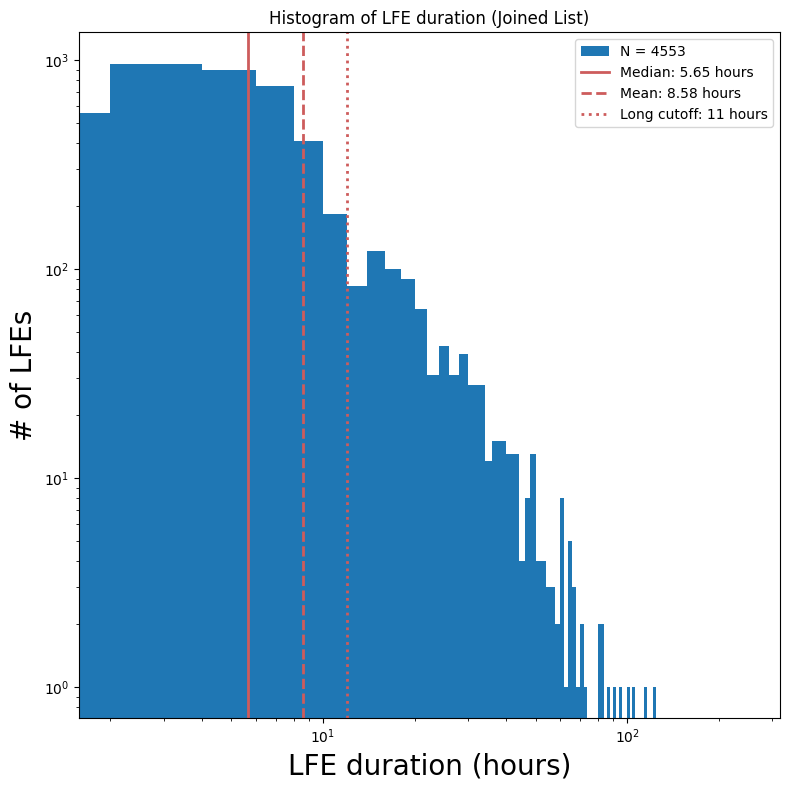

In [3]:
LFE_df = pd.read_csv('../data/calculated/LFEs_joined.csv', parse_dates=['start','end'])

LFE_duration = LFE_df['end']-LFE_df['start']  #want this in minutes and to be smart about day/year boundaries

LFE_secs = []
for i in range(np.array(LFE_duration).size):
    LFE_secs.append(LFE_duration[i].total_seconds())

PlotDurationHistogram(LFE_secs)